In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('IBM Attrition Data.csv')
df = dataset.copy() #Creating the copy of the dataframe 
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [28]:
df.columns.values

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

In [17]:
class_1 = df[df.Attrition =='Yes'] # Attrition; 1 = Yes
class_0 = df[df.Attrition =='No'] # Attrition; 0 = No

In [ ]:
### ik7u
class_0['Attrition'].replace({'Yes':1, 'No':0},inplace=True)

In [4]:
class_1.head()

NameError: name 'class_1' is not defined

<AxesSubplot:xlabel='Age', ylabel='Density'>

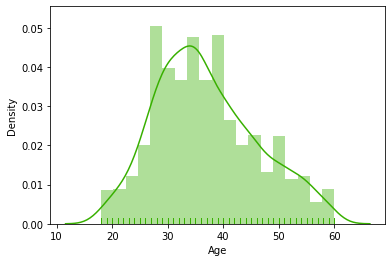

In [10]:
#fig, axs = plt.subplots(figsize=(15,12))
#axs = axs.flatten()
sns.distplot(df['Age'],rug=True,color='#38b000')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

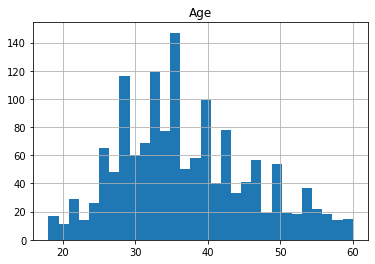

In [31]:
df.hist(column="Age",bins=30)

<AxesSubplot:>

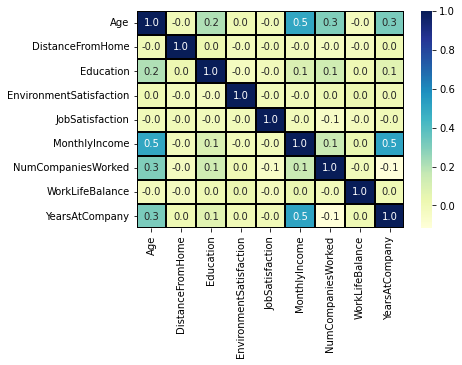

In [22]:
corr = df.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu" 
            )

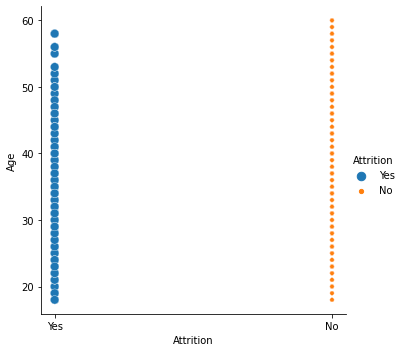

In [32]:
sns.relplot(x='Attrition',
            y='Age',
            data = df,
            hue = 'Attrition',
            size='Attrition')

In [34]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

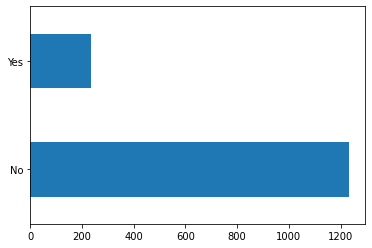

In [36]:
df.Attrition.value_counts().plot(kind='barh')

<AxesSubplot:>

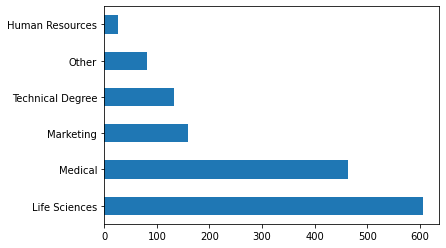

In [37]:
df.EducationField.value_counts().plot(kind='barh')

<AxesSubplot:>

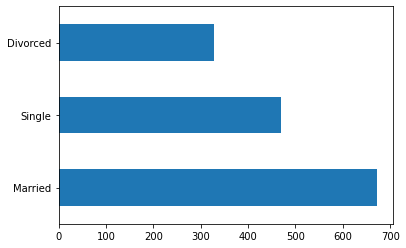

In [38]:
df.MaritalStatus.value_counts().plot(kind='barh')

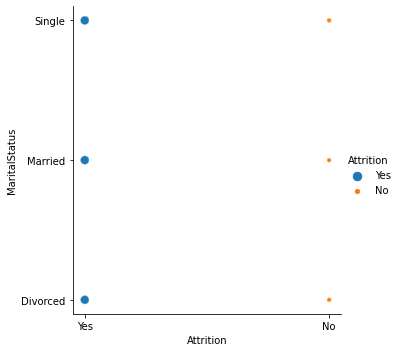

In [39]:
sns.relplot(x='Attrition',
            y='MaritalStatus',
            data = df,
            hue = 'Attrition',
            size='Attrition')

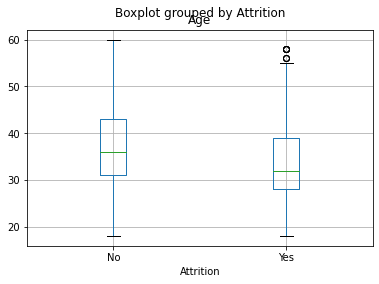

In [3]:
df.boxplot(column="Age",by="Attrition")

In [41]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [5]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pyod'

In [3]:
pip install pyod

^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,1,2,4,1,5993,8,1,6
1,49,0,2,8,1,1,3,2,2,5130,1,3,10
2,37,1,2,2,2,2,4,3,1,2090,6,3,0
3,33,0,2,3,4,1,4,3,2,2909,1,3,8
4,27,0,2,2,1,3,1,2,2,3468,9,3,2


In [11]:
df.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [5]:
df['Attrition'].replace({'Yes':1, 'No':0},inplace=True)

In [4]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [6]:
df['Department'].replace({'Sales':1, 'Research & Development':2, 'Human Resources':3},inplace=True)

In [7]:
df['MaritalStatus'].replace({'Single':1, 'Married':2, 'Divorced':3},inplace=True)

In [8]:
df['EducationField'].replace({'Life Sciences':1, 'Other':2, 'Medical':3, 'Marketing':4, 'Technical Degree':5, 'Human Resources':6},inplace=True)

In [14]:
EA = setup(data= df, target= 'Attrition', normalize=True, session_id=1)

NameError: name 'setup' is not defined